<a href="https://colab.research.google.com/github/MariaCamilaPatinoJaramillo/Signal-3/blob/Miniproyecto2/Miniproyecto_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproyecto 1 Modelos de Variable Latente para el Reconocimiento de Acciones Motoras

* **Maria Camila Patiño Jaramillo**

* **Jesus David Restrepo Martinez**

* **Daniel Arturo Vega Hernandez**


**Tratamiento de Señales III**

*Universidad de Antioquia*

*Prof. Hernán Felipe García Arias, PhD*

2021-2

##LINK DEL REPO: https://github.com/MariaCamilaPatinoJaramillo/Signal-3

#Cargando la señal EMG

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
ruta1 = '/content/drive/MyDrive/Miniproyecto-Señales3/Miniproyecto2/DataFrameB.csv'
matriz_completa = pd.read_csv(ruta1)

In [ ]:
import pandas as pd  
Nombres = ['RMS','MAE','P1','P2','P3','P4','P5','F1','F2','F3','F4','F5','Num Cruces Por Cero','Entropia w1', 'Cruces por cero w1', 'Cruce con la media w1', 'Percentil 5 w1','Percentil 25 w1','Percentil 75 w1','Percentil 95 w1','Mediana w1','Media w1','Std w1', 'Varianza w1', 'RMS w1','Entropia w2', 'Cruces por cero w2', 'Cruce con la media w2', 'Percentil 5 w2','Percentil 25 w2','Percentil 75 w2','Percentil 95 w2','Mediana w2','Media w2','Std w2', 'Varianza w2', 'RMS w2','Entropia w3', 'Cruces por cero w3', 'Cruce con la media w3', 'Percentil 5 w3','Percentil 25 w3','Percentil 75 w3','Percentil 95 w3','Mediana w3','Media w3','Std w3', 'Varianza w3', 'RMS w3','Entropia w_1_1', 'Cruces por cero w_1_1', 'Cruce con la media w_1_1', 'Percentil 5 w_1_1','Percentil 25 w_1_1','Percentil 75 w_1_1','Percentil 95 w_1_1','Mediana w_1_1','Media w_1_1','Std w_1_1', 'Varianza w_1_1', 'RMS w_1_1','Tipo de Mov']
dataFrame = pd.DataFrame(data = matriz_completa,columns= Nombres)

In [ ]:
#BD con todos los datos completos 
dataFrame

,RMS,MAE,P1,P2,P3,P4,P5,F1,F2,F3,...,Percentil 5 w_1_1,Percentil 25 w_1_1,Percentil 75 w_1_1,Percentil 95 w_1_1,Mediana w_1_1,Media w_1_1,Std w_1_1,Varianza w_1_1,RMS w_1_1,Tipo de Mov
0,9.640368e-16,0.124181,-24.510315,-24.113682,-22.973331,-22.668456,-20.580252,73.333333,60.000000,106.666667,...,-0.003023,-0.000930,0.000930,0.002558,0.0,-5.813623e-07,0.001791,0.000003,0.001268,0.0
1,7.222425e-17,0.140894,-22.066990,-21.769165,-21.027955,-20.872663,-20.447376,106.666667,53.333333,86.666667,...,-0.006744,-0.001860,0.001628,0.006976,0.0,-1.790596e-06,0.004129,0.000017,0.002803,0.0
2,3.768222e-16,0.137592,-22.633787,-22.579174,-21.904142,-21.901437,-21.119429,100.000000,60.000000,53.333333,...,-0.008139,-0.002325,0.002093,0.008372,0.0,-9.069252e-07,0.004959,0.000025,0.003441,0.0
3,8.729714e-16,0.159535,-21.146537,-21.044106,-20.848960,-20.630571,-20.237451,60.000000,46.666667,120.000000,...,-0.009069,-0.002791,0.002558,0.009302,0.0,4.790425e-06,0.005466,0.000030,0.003934,0.0
4,7.662051e-16,0.178562,-19.884666,-19.147033,-18.817477,-18.761468,-18.557749,46.666667,80.000000,106.666667,...,-0.009069,-0.002849,0.002791,0.009302,0.0,2.557994e-07,0.005545,0.000031,0.004027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,5.514165e-15,0.315701,-19.789814,-18.026123,-14.557632,-10.500420,-9.683625,100.000000,33.333333,40.000000,...,-0.002093,-0.000930,0.000698,0.002325,0.0,-1.302252e-06,0.001282,0.000002,0.000993,5.0
1130,2.600073e-15,0.325574,-24.162934,-20.242869,-18.705906,-9.839973,-9.527056,100.000000,60.000000,40.000000,...,-0.002093,-0.000930,0.000698,0.002325,0.0,-2.209177e-06,0.001304,0.000002,0.001012,5.0
1131,2.951774e-16,0.285869,-21.530284,-20.368430,-18.222016,-12.845350,-11.878246,100.000000,40.000000,60.000000,...,-0.001628,-0.000698,0.000698,0.001860,0.0,-5.581078e-07,0.001115,0.000001,0.000863,5.0
1132,8.415696e-16,0.304854,-20.820466,-20.052932,-18.654113,-12.185909,-10.597152,100.000000,60.000000,40.000000,...,-0.001628,-0.000698,0.000698,0.001860,0.0,7.441437e-07,0.001112,0.000001,0.000863,5.0


#Visualizando la señal EMG

In [ ]:
#BD con las mejores caracteristicas
mejores = dataFrame[['P1','P2','P3','P4','P5','Percentil 5 w_1_1','Percentil 25 w_1_1','Percentil 75 w_1_1','Percentil 95 w_1_1','Tipo de Mov']]

In [ ]:
mejores

,P1,P2,P3,P4,P5,Percentil 5 w_1_1,Percentil 25 w_1_1,Percentil 75 w_1_1,Percentil 95 w_1_1,Tipo de Mov
0,-24.510315,-24.113682,-22.973331,-22.668456,-20.580252,-0.003023,-0.000930,0.000930,0.002558,0.0
1,-22.066990,-21.769165,-21.027955,-20.872663,-20.447376,-0.006744,-0.001860,0.001628,0.006976,0.0
2,-22.633787,-22.579174,-21.904142,-21.901437,-21.119429,-0.008139,-0.002325,0.002093,0.008372,0.0
3,-21.146537,-21.044106,-20.848960,-20.630571,-20.237451,-0.009069,-0.002791,0.002558,0.009302,0.0
4,-19.884666,-19.147033,-18.817477,-18.761468,-18.557749,-0.009069,-0.002849,0.002791,0.009302,0.0
...,...,...,...,...,...,...,...,...,...,...
1129,-19.789814,-18.026123,-14.557632,-10.500420,-9.683625,-0.002093,-0.000930,0.000698,0.002325,5.0
1130,-24.162934,-20.242869,-18.705906,-9.839973,-9.527056,-0.002093,-0.000930,0.000698,0.002325,5.0
1131,-21.530284,-20.368430,-18.222016,-12.845350,-11.878246,-0.001628,-0.000698,0.000698,0.001860,5.0
1132,-20.820466,-20.052932,-18.654113,-12.185909,-10.597152,-0.001628,-0.000698,0.000698,0.001860,5.0


In [ ]:
mejores.to_csv('mejores.csv', index=False)

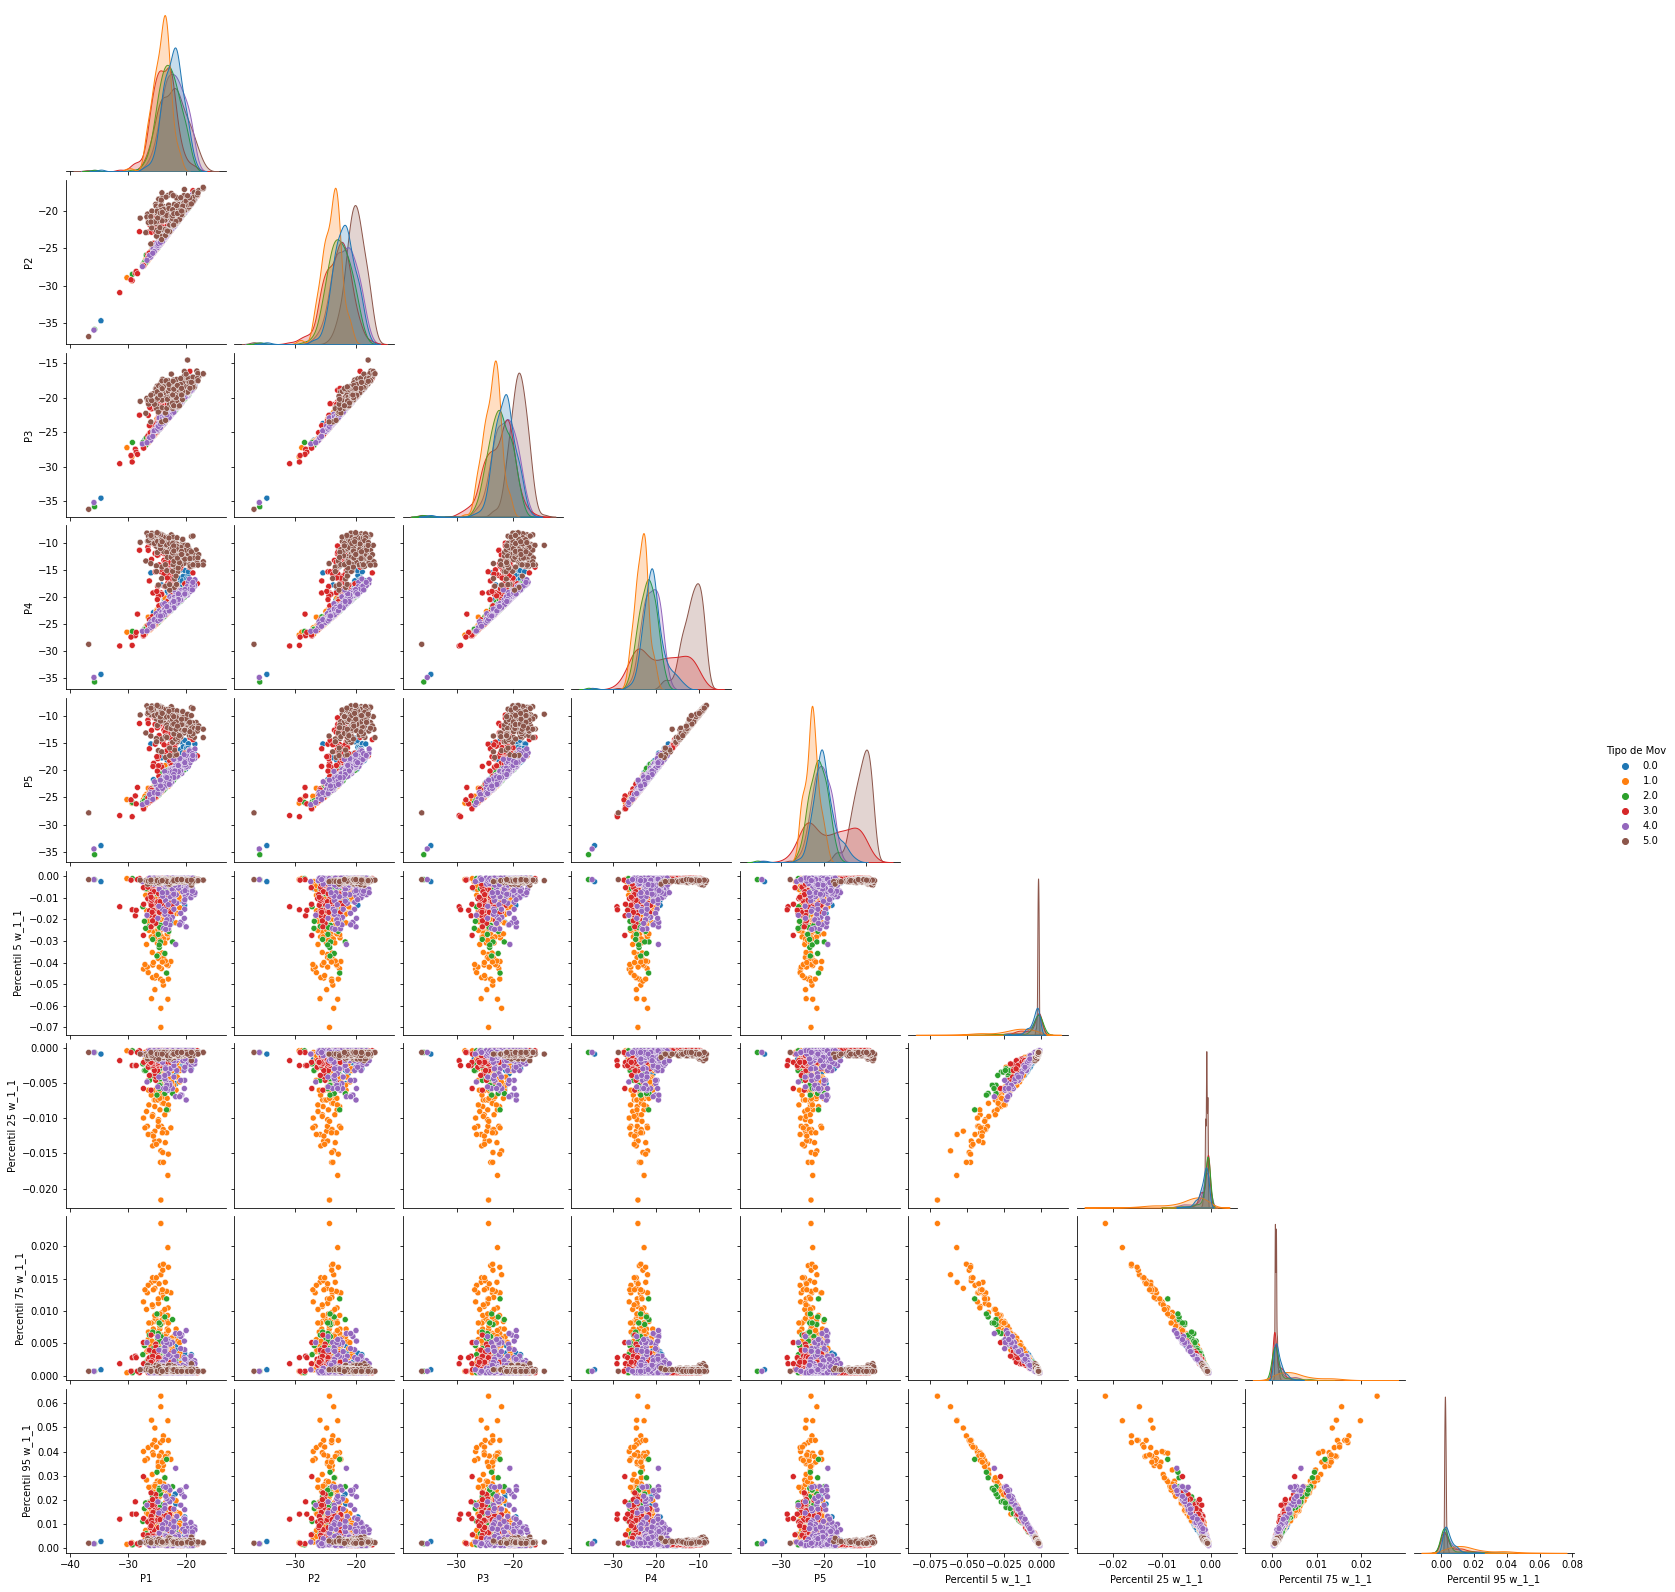

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subSet = mejores
unique = subSet["Tipo de Mov"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
sns.pairplot(subSet, hue = "Tipo de Mov",corner=True, palette=palette)

#PCA y Kernel PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import numpy as np

##PCA

###PCA: Análisis Cualitativo

In [ ]:
#PCA Cualitativo
from ipywidgets import interact
@interact(n_components = (2,62,10))

def PCA_Analisis_Cualitativo(n_components):
  pca = PCA(n_components = n_components)  # project from 62 to n_components dimensions
  # Load our dataset X
  X = dataFrame
  projectedZ = pca.fit_transform(X)
  BasisW = pca.components_
  print('Input Space:',dataFrame.shape)
  print('Latent Space:',projectedZ.shape)
  #print(pca.explained_variance_)
  print(BasisW.shape)

  #Graficando
  plt.scatter(projectedZ[:, 0], projectedZ[:, 1],
              c=dataFrame['Tipo de Mov'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('tab10', 10))
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.colorbar();

interactive(children=(IntSlider(value=32, description='n_components', max=62, min=2, step=10), Output()), _dom…

###PCA: Análisis Cuantitativo

In [16]:
#PCA Cuantitativo
from ipywidgets import interact
@interact(Flag_Space = ['Latent','Input'], n_components = (2,62,10), test_size = (0.2,0.5,0.1))

def ExperimentoBayes_PCA(Flag_Space,n_components,test_size):
  if Flag_Space == 'Input':
    X = dataFrame
    y = dataFrame['Tipo de Mov']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

  if Flag_Space == 'Latent':
    pca = PCA(n_components = n_components)  # project from 62 to n_components dimensions
    projectedZ = pca.fit_transform(dataFrame)
    X = projectedZ
    y = dataFrame['Tipo de Mov']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)
  # Realizamo el análisis del erro
  error = np.sum(np.abs(y_pred-y_test))
  Acierto = 1.- error/len(y_test)
  # Analizar algo que se conoce como una matriz de confusión
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test)
  print('Acc(%): ',porcentajeAcierto)
  ax = ConfusionMatrixDisplay(CMAT,display_labels=['0','1','2','3','4','5'])
  ax.plot()
  plt.show()

interactive(children=(Dropdown(description='Flag_Space', options=('Latent', 'Input'), value='Latent'), IntSlid…

##Kernel PCA

###Kernel PCA: Análisis Cualitativo

In [17]:
#Kernel PCA Cualitativo
from ipywidgets import interact
@interact(kernel=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'], n_components = (2,62,10))

def KernelPCA_Analisis_Cualitativo(kernel, n_components):
  kernelpca = KernelPCA(n_components = n_components, kernel = kernel)  # project from 62 to n_components dimensions
  # Load our dataset X
  X = dataFrame
  projectedZKernel = kernelpca.fit_transform(X)
  print('Input Space:',dataFrame.shape)
  print('Latent Space:',projectedZKernel.shape)

  #Graficando
  plt.scatter(projectedZKernel[:, 0], projectedZKernel[:, 1],
              c=dataFrame['Tipo de Mov'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('tab10', 10))
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.colorbar();

interactive(children=(Dropdown(description='kernel', options=('linear', 'poly', 'rbf', 'sigmoid', 'cosine'), v…

###Kernel PCA: Análisis Cuantitativo 

In [18]:
#Kernel PCA Cuantitativo
from ipywidgets import interact
@interact(Flag_Space = ['Latent','Input'], kernel=['linear', 'poly', 'rbf', 'sigmoid', 'cosine'], n_components = (2,62,10), test_size = (0.2,0.5,0.1),gamma=(1/62,1,2/62),alpha=(0,1,0.1))

def ExperimentoBayes_KernelPCA(Flag_Space,kernel,n_components,test_size,gamma,alpha):
  if Flag_Space == 'Input':
    X = dataFrame
    y = dataFrame['Tipo de Mov']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

  if Flag_Space == 'Latent':
    kernelpca = KernelPCA(n_components = n_components, kernel = kernel,gamma=gamma,alpha=alpha)  # project from 62 to n_components dimensions
    projectedZKernel = kernelpca.fit_transform(dataFrame)
    X = projectedZKernel
    y = dataFrame['Tipo de Mov']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)
  # Realizamo el análisis del erro
  error = np.sum(np.abs(y_pred-y_test))
  Acierto = 1.- error/len(y_test)
  # Analizar algo que se conoce como una matriz de confusión
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test)
  print('Acc(%): ',porcentajeAcierto)
  ax = ConfusionMatrixDisplay(CMAT,display_labels=['0','1','2','3','4','5'])
  ax.plot()
  plt.show()

interactive(children=(Dropdown(description='Flag_Space', options=('Latent', 'Input'), value='Latent'), Dropdow…

##**Conclusiones**

-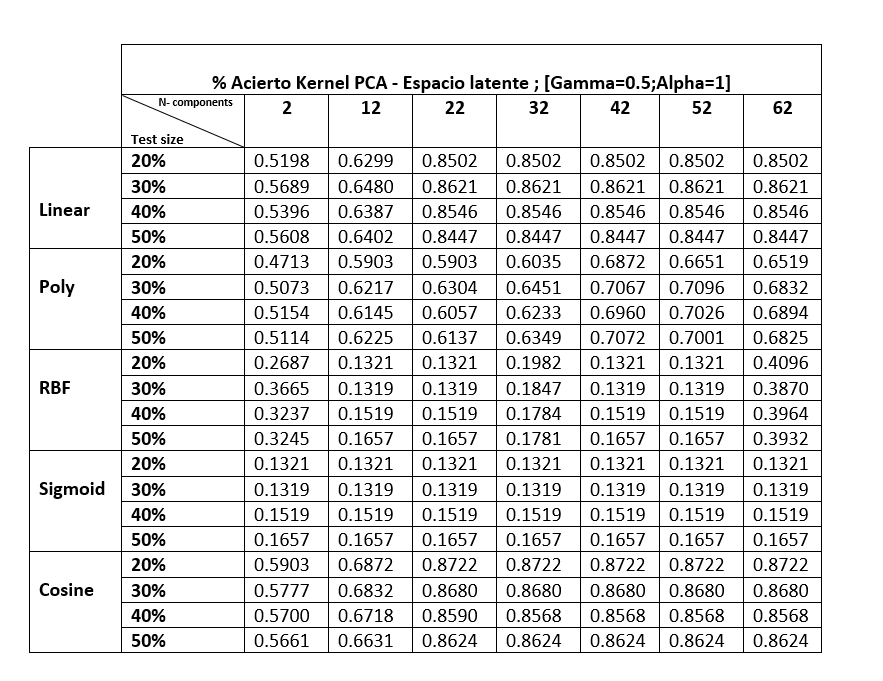


- Cuando se hace la variacion de los parametros gamma y alpha para los tipos de kernel  no se observa que estos hagan una contribucion significativa a el porcentaje de acierto del algoritmo, a excepcion del parametro gamma en el tipo de kernl RBF, ya que para este caso cuando el valor aumento, el % de acierto del algoritmo presenta mejoras, con un margen aproximado del 10% tanto de subida (mejora) como bajada (desmejora)
- El kernel PCA en general es una representacion por medio de funciones no lineales, cuando se le asigna el kernel lineal al kernel PCA, lo que se esta haciendo es dandole un parametro lineal, con lo cual yo no se estaria trabajando con kernel PCA sino con PCA 
- Para las representaciones de kernel lineal y cosine se puede observar que el % de acierto del algoritmo permanece constante para componente mayores o iguales a 22 y que este representa un valor aceptable para el reconocimiento de las clases, lo cual implica que el costo computacional se puede ver reducido a partir de las 22 componentes y que esto no afecta la efectividad del algoritmo, ya que mas componentes no implican un mayor % de reconocimiento 
-El peor caso para el reconocimiento para los datos que se tienen se dio usando kernel: RBF, ya que este no es capaz de identificar ninguna de las clases, ya que a todos los valores los relaciona con un mismo tipo de movimiento, para nuestro caso el movimiento cero.
- Para Kernel PCA el mejor % que se obtuvo fue con el valor de Kernel Cosine a partir de las 22 componentes, con lo cual se reafirma que el costo computacional se reduce y no es necesario trabajar con todas las componentes para obtener un buen margen de reconocimiento
-Para el caso de PCA se puede obtener que mejor % se obtiene a partir de las 22 caracteristicas 
- Para el caso del test size, que corresponde al tamaño de los datos de prueba se puede decir que es suficiente con que se mantenga entre el 20 y el 50% de los datos total, ya que esto genera un equilibrio para cuando se requiera realizar las pruebas
- El % de datos de prueba aumenta el % de acierto pero este no representa un crecimiento significativo, caso contrario al numero de componentes 
- Realizando un analisis cualitativo de kernel PCA se puede observar que tanto para el tipo Lineal, Cosine y Poly se tienen los grupos de los tipos de movimientos separados entre si, algunos de estos grupos son mas notorios que otros como:
    - En el caso del kernel tipo Cosine el movimiento tipo 5 se diferencia un poco mejor que los demas, mientras que el tipo 3 o tipo 2 son los mas dificiles de diferenciar, esto se evidencia en la matriz de confusion en la cual los errores de identificaciones de clases se comenten en mayor medida para los movimientos o clases 2 y 3.
    - En el caso del kernel tipo lineal se  presenta la misma situacion que para el Cosine, ya que los movimientos 2 y 3 son los menos diferenciables, caso contrario al movimiento 5 siendo este el que mejor rendimiento presenta, todo esto se evidencia en la matriz de confusion donde los errores de identificacion se presentan en las clases 2 y 3.
    - El caso del kernel Poly es el que peores condiciones de agrupacion y de reconocimiento presentan ya que los valores de las clases 2,3 y 4 no presentan una agrupacion diferenciables de las demas clases y los valores en el reconocimiento con la matriz de confusion son pesimos, contrario a la clases 5 que se mantiene como el movimiento mas diferenciable y mas identificables por el algoritmo.

- El analisis cualitativo del Kernel PCA tipo RBF brinda un pesimo desempeño en la separacion de los tipos de movimiento puesto que marca los datos en practicamente 3 grupos, lo que hace que la prediccion y su % de acierto sea demasiado bajo, tal como se evidencia en las graficas y en la matriz de confusion. Por esta razon no es recomendable usar este tipo de kernel para estos datos.
- El analisis cualitativo del Kernel PCA tipo Sigmoid brinda un pesimo desempeño en la separacion de los tipos de movimiento puesto que marca los datos en un unico grupo, lo que hace que la prediccion y su % de acierto sea practicamente nulo, tal como se evidencia en las graficas y en la matriz de confusion. Por esta razon no se recomienda utilizar este tipo de kernel para estos datos.